In [1]:
#Tratamieto de datos
import pandas as pd #
import numpy as np  #
# ==============================================================================================================================================================

#   Gráficos 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# ==============================================================================================================================================================

#Procesado y Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ==============================================================================================================================================================

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
# Configuración warnings
# ==============================================================================================================================================================

#Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel(r"D:\Never Urueta\2023\Tesis\Data.xlsx") 

In [3]:
data.Rechazados.describe()

count    1914.000000
mean        0.552247
std         0.930765
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: Rechazados, dtype: float64

In [4]:
print("Número de Veces que Temp3 <2°C :",len(data[data["Temp3"]<2]))
print("Número de Veces que Temp3 <0°C :",len(data[data["Temp3"]<0]))

Número de Veces que Temp3 <2°C : 470
Número de Veces que Temp3 <0°C : 117


In [5]:
data1 = data.drop(["PBA", "CF", "Indicador", "DESTINO", "CAPACIDAD DEL CUARTO FRIO  ", "VT2", "VT1"], axis=1)

In [6]:
data1.loc[data1["Rechazados"] > 0, "Rechazados"] = 1

In [7]:
print("Cantidad de Rechazos en todos los registros 1, No Rechazados 0:")
print("----------------------------------------------------------------")
data1.Rechazados.value_counts().sort_index()

Cantidad de Rechazos en todos los registros 1, No Rechazados 0:
----------------------------------------------------------------


0    1329
1     585
Name: Rechazados, dtype: int64

# <span style="color:darkred"> Umbral de Clasificación Esperado
<span style="color:darkblue"> En el 69.4% de las maduraciones No se rechazan canales y en el 30.6% sí se rechazan. Un modelo de clasificación que sea útil debe de ser capaz de predecir correctamente un porcentaje de observaciones totales por encima del porcentaje de la clase mayoritaria. En este caso, el umbral de referencia que se tiene que superar es del 69.4%.

# <span style="color:darkred"> Variables

In [8]:
features = list(set(data1.columns.values) - set(['ID', 'TARGET']))
cat_features = [feat for feat in features if data1[feat].dtype.name in ['category', 'object']]
num_features = list(set(features) - set(cat_features))

print(f"Factores Categoricos: \n {cat_features}")
print(f"Factores Numéricos: \n {num_features}")

Factores Categoricos: 
 ['Dia_Semana', 'pH_Requisito', 'Franja1', 'Refrigeracion', 'TIPO_CAP_CF', 'Franja2']
Factores Numéricos: 
 ['Tamin', 'Canales', 'Taamax', 'Temp1', 'Temp2', 'Ti1', 'Ocupacion', 'Rechazados', 'Ti2', 'PPPCF', 'Temp3']


## <span style="color:darkgreen"> Datos Faltantes

In [9]:
data1.isnull().sum() #Datos faltantes

Dia_Semana        0
Temp1             0
Franja1           0
Temp2             0
Franja2           0
Ti1               0
Temp3             0
Ti2               0
Refrigeracion     0
Canales           0
PPPCF             0
Ocupacion         0
pH_Requisito      0
Tamin            29
Taamax           29
TIPO_CAP_CF       0
Rechazados        0
dtype: int64

In [10]:
data1['Tamin'].fillna(data1['Tamin'].median(), inplace=True)
print("valores perdidos en Tamin: " + 
      str(data1['Tamin'].isnull().sum()))
data1['Taamax'].fillna(data1['Taamax'].median(), inplace=True)
print("valores perdidos en Taamax: " + 
      str(data1['Taamax'].isnull().sum()))

valores perdidos en Tamin: 0
valores perdidos en Taamax: 0


## <span style="color:darkgreen"> Variables Numericas


In [11]:
data1.describe()

,Temp1,Temp2,Ti1,Temp3,Ti2,Canales,PPPCF,Ocupacion,Tamin,Taamax,Rechazados
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,3.080371,11.733454,2.129855,2.766437,33.368273,136.827586,22.518286,93.083697,23.857913,32.530543,0.305643
std,1.614204,3.365969,1.135182,1.774718,14.483894,30.208935,15.420267,11.038884,0.960839,1.664524,0.460799
min,-4.700000,1.400000,0.166667,-5.600000,24.000000,27.000000,3.991370,19.354839,20.400000,27.200000,0.000000
25%,2.100000,10.000000,1.583333,2.000000,24.250000,140.000000,17.022934,91.888046,23.300000,31.600000,0.000000
50%,2.900000,11.500000,1.883333,3.000000,25.250000,150.000000,19.326683,96.774194,24.000000,32.600000,0.000000
75%,3.900000,13.800000,2.483333,3.800000,37.757500,155.000000,23.219814,100.000000,24.500000,33.600000,1.000000
max,18.200000,39.400000,16.183333,7.300000,110.200000,239.000000,100.000000,104.761905,26.000000,36.300000,1.000000


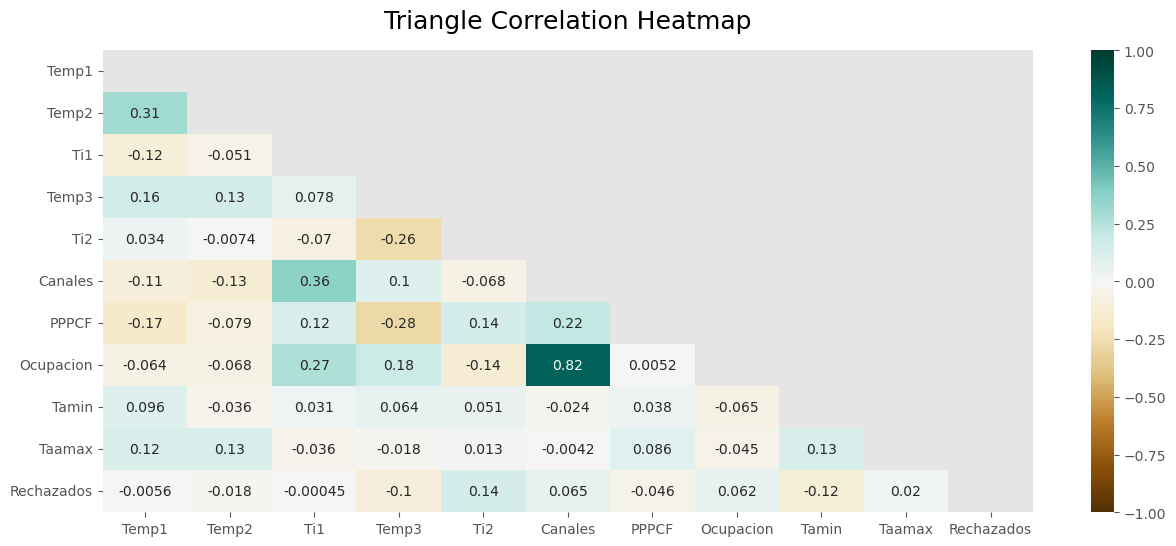

In [12]:
plt.figure(figsize=(15,6))
mask = np.triu(np.ones_like(data1.corr(), dtype=np.bool))
heatmap = sns.heatmap(data1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

In [13]:
data1 = data1.drop(["Canales"], axis=1)

## <span style="color:darkgreen"> Variables Categóricas 

<span style="color:darkblue"> Las variables categóricas se combierten en variables dummys, el número de nuevas variables corresponderán al numero de factores menos 1 para evitar multicolinealdad

In [14]:
data1 = pd.get_dummies(data1, drop_first = True, columns = ["Franja1", "Franja2", "Dia_Semana"]) # el parámetro drop first la primera categoría, para evitar problemas de multicolinealidad
data1 = pd.get_dummies(data1, columns = ["Refrigeracion", "pH_Requisito", "TIPO_CAP_CF"]) 

In [15]:
data1.columns

Index(['Temp1', 'Temp2', 'Ti1', 'Temp3', 'Ti2', 'PPPCF', 'Ocupacion', 'Tamin',
       'Taamax', 'Rechazados', 'Franja1_MAÑANA', 'Franja1_MEDIO_DIA',
       'Franja1_NOCHE', 'Franja1_TARDE', 'Franja2_MAÑANA', 'Franja2_MEDIO_DIA',
       'Franja2_NOCHE', 'Franja2_TARDE', 'Dia_Semana_lunes',
       'Dia_Semana_martes', 'Dia_Semana_miércoles', 'Dia_Semana_sábado',
       'Dia_Semana_viernes', 'Refrigeracion_AMONIACO', 'Refrigeracion_GLICOL',
       'pH_Requisito_Mi_5.8', 'pH_Requisito_Mi_6', 'TIPO_CAP_CF_C1',
       'TIPO_CAP_CF_C2', 'TIPO_CAP_CF_C3', 'TIPO_CAP_CF_PBA2'],
      dtype='object')

In [16]:
print("Capacidad Tipo 1:", data1.TIPO_CAP_CF_C1.sum(),'\n',
      "Capacidad Tipo 2:", data1.TIPO_CAP_CF_C2.sum(),'\n',
      "Capacidad Tipo 3:", data1.TIPO_CAP_CF_C3.sum(),'\n',
      "Capacidad Frigosinú:", data1.TIPO_CAP_CF_PBA2.sum())

Capacidad Tipo 1: 187 
 Capacidad Tipo 2: 124 
 Capacidad Tipo 3: 1531 
 Capacidad Frigosinú: 72


In [17]:
data1 = data1.drop(["Refrigeracion_GLICOL", "pH_Requisito_Mi_6", "TIPO_CAP_CF_PBA2"], axis=1)

# <span style="color:darkred"> Primer Modelo Logístico con Multicolinealidad

In [18]:
data1 = sm.add_constant(data1)
modelo=sm.Logit(data1["Rechazados"],data1.drop(["Rechazados"], axis=1))
modelo=modelo.fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.562399
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Rechazados   No. Observations:                 1914
Model:                          Logit   Df Residuals:                     1886
Method:                           MLE   Df Model:                           27
Date:                Fri, 14 Jul 2023   Pseudo R-squ.:                 0.08638
Time:                        23:00:06   Log-Likelihood:                -1076.4
converged:                       True   LL-Null:                       -1178.2
Covariance Type:            nonrobust   LLR p-value:                 5.260e-29
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0517      2.175     -0.024      0.981      -4.315       4.212
Temp1                     -0.0371      0.039     -0.956      0.339      -0.113       0.039
Temp2                     -0.0034      0.018     -0.192      0.847      -0.039       0.032
Ti1                       -0.0290      0.060     -0.485      0.628      -0.146       0.088
Temp3                     -0.1462      0.033     -4.433      0.000      -0.211      -0.082
Ti2                        0.0240      0.004      5.854      0.000       0.016       0.032
PPPCF                      0.0143      0.009      1.618      0.106      -0.003       0.032
Ocupacion                  0.0074      0.007      1.041      0.298      -0.007       0.021
Tamin                     -0.3094      0.056     -5.539      0.000      -0.419      -0.200
Taamax                     0.0663      0.033      2.010      0.044       0.002       0.131
Franja1_MAÑANA            -0.6371      0.906     -0.703      0.482      -2.414       1.140
Franja1_MEDIO_DIA         -0.4849      0.888     -0.546      0.585      -2.225       1.256
Franja1_NOCHE             -0.6869      0.865     -0.794      0.427      -2.383       1.009
Franja1_TARDE             -0.6660      0.878     -0.759      0.448      -2.386       1.054
Franja2_MAÑANA            -0.8757      0.589     -1.486      0.137      -2.031       0.279
Franja2_MEDIO_DIA         -0.7412      0.563     -1.316      0.188      -1.845       0.363
Franja2_NOCHE             -0.6829      0.462     -1.478      0.139      -1.588       0.223
Franja2_TARDE             -0.4796      0.486     -0.986      0.324      -1.433       0.474
Dia_Semana_lunes           0.2873      0.186      1.547      0.122      -0.077       0.651
Dia_Semana_martes          0.2574      0.178      1.447      0.148      -0.091       0.606
Dia_Semana_miércoles       0.2270      0.178      1.275      0.202      -0.122       0.576
Dia_Semana_sábado         -0.2258      0.189     -1.198      0.231      -0.595       0.144
Dia_Semana_viernes        -0.4310      0.196     -2.201      0.028      -0.815      -0.047
Refrigeracion_AMONIACO     0.1251      0.128      0.978      0.328      -0.126       0.376
pH_Requisito_Mi_5.8        0.4420      0.130      3.400      0.001       0.187       0.697
TIPO_CAP_CF_C1             3.8949      1.071      3.635      0.000       1.795       5.995
TIPO_CAP_CF_C2             4.0832      1.049      3.894      0.000       2.028       6.138
TIPO_CAP_CF_C3             4.1397      0.978      4.233      0.000       2.223       6.057
==========================================================================================
"""

## <span style="color:darkgreen"> Detectando y Eliminando Multicolinealidad 

In [19]:
#Multicolinealidad - VIFs
mc = pd.DataFrame(pd.Series([variance_inflation_factor(data1.drop(["Rechazados"], axis=1), i) 
               for i in range(data1.drop(["Rechazados"], axis=1).shape[1])], 
              index=data1.drop(["Rechazados"], axis=1).columns) )            

In [20]:
mc.columns = ["VIFs"]
mc

,VIFs
const,1514.556230
Temp1,1.259138
Temp2,1.285794
Ti1,1.505831
Temp3,1.286710
Ti2,1.310146
PPPCF,4.670672
Ocupacion,1.843314
Tamin,1.069315
Taamax,1.090818


In [21]:
data1 = data1.drop([ "Franja1_MAÑANA", "Franja1_MEDIO_DIA","Franja1_NOCHE", "Franja1_TARDE", "Franja2_TARDE", "TIPO_CAP_CF_C1"], axis=1)

In [22]:
mc2 = pd.DataFrame(pd.Series([variance_inflation_factor(data1.drop(["Rechazados"], axis=1), i) 
               for i in range(data1.drop(["Rechazados"], axis=1).shape[1])], 
              index=data1.drop(["Rechazados"], axis=1).columns))     
mc2.columns = ["VIFs"]
mc2   

,VIFs
const,1088.221820
Temp1,1.225575
Temp2,1.239589
Ti1,1.199346
Temp3,1.255308
Ti2,1.261597
PPPCF,1.495837
Ocupacion,1.809575
Tamin,1.063604
Taamax,1.077512


# <span style="color:darkred"> Modelo 1 Logístico Clásico sin Multicolinelidad

In [23]:

X=data1.drop(["Rechazados"], axis=1)
Y=data1.Rechazados

In [24]:
#Nuevo modelo
model=sm.Logit(Y,X)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.568024
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Rechazados   No. Observations:                 1914
Model:                          Logit   Df Residuals:                     1892
Method:                           MLE   Df Model:                           21
Date:                Fri, 14 Jul 2023   Pseudo R-squ.:                 0.07724
Time:                        23:00:06   Log-Likelihood:                -1087.2
converged:                       True   LL-Null:                       -1178.2
Covariance Type:            nonrobust   LLR p-value:                 1.207e-27
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.7295      1.723      1.584      0.113      -0.647       6.106
Temp1                     -0.0129      0.037     -0.349      0.727      -0.085       0.060
Temp2                     -0.0091      0.017     -0.525      0.600      -0.043       0.025
Ti1                       -0.0385      0.053     -0.723      0.469      -0.143       0.066
Temp3                     -0.1311      0.032     -4.058      0.000      -0.194      -0.068
Ti2                        0.0271      0.004      6.760      0.000       0.019       0.035
PPPCF                     -0.0130      0.005     -2.491      0.013      -0.023      -0.003
Ocupacion                  0.0050      0.007      0.736      0.462      -0.008       0.018
Tamin                     -0.2957      0.055     -5.331      0.000      -0.404      -0.187
Taamax                     0.0613      0.033      1.879      0.060      -0.003       0.125
Franja2_MAÑANA            -0.4611      0.199     -2.312      0.021      -0.852      -0.070
Franja2_MEDIO_DIA         -0.3167      0.151     -2.096      0.036      -0.613      -0.020
Franja2_NOCHE             -0.3513      0.132     -2.652      0.008      -0.611      -0.092
Dia_Semana_lunes           0.2774      0.184      1.504      0.133      -0.084       0.639
Dia_Semana_martes          0.2597      0.177      1.469      0.142      -0.087       0.606
Dia_Semana_miércoles       0.2093      0.177      1.183      0.237      -0.138       0.556
Dia_Semana_sábado         -0.2980      0.187     -1.594      0.111      -0.664       0.068
Dia_Semana_viernes        -0.4860      0.196     -2.486      0.013      -0.869      -0.103
Refrigeracion_AMONIACO     0.0763      0.126      0.607      0.544      -0.170       0.323
pH_Requisito_Mi_5.8        0.5055      0.130      3.888      0.000       0.251       0.760
TIPO_CAP_CF_C2             0.5245      0.300      1.749      0.080      -0.063       1.112
TIPO_CAP_CF_C3             0.8546      0.237      3.601      0.000       0.389       1.320
==========================================================================================
"""

## <span style="color:darkgreen"> Predicción y AIC 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5680237285834134
            Iterations: 99
            Function evaluations: 107
            Gradient evaluations: 99


<AxesSubplot:title={'center':'M. de Confusión Modelo Log. Clásico con Todos los predictores'}>

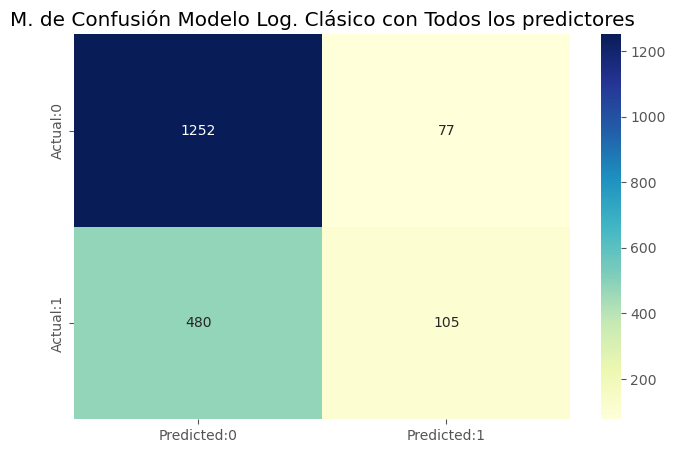

In [25]:
from sklearn.metrics import confusion_matrix
res= model.fit_regularized()
#accuracy = accuracy_score(y_true = data1["Rechazados_Binario"], y_pred = np.where(res.predict(data1.drop(["Rechazados_Binario"], axis=1)) <0.5, 0, 1), normalize = True)
cm=confusion_matrix(data1["Rechazados"],np.where(result.predict(data1.drop(["Rechazados"], axis=1)) <0.5, 0, 1))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title('M. de Confusión Modelo Log. Clásico con Todos los predictores')
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
cm=confusion_matrix(Y,np.where(res.predict(X) <0.5, 0, 1))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
#sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
VN = cm[1,1]
VP = cm[0,0]
FN = cm[0,1]
FP = cm[1,0] 
accuracy = (VP+VN)/(VP+VN+FP+FN) #Acurracy
Sensibilidad = VP/float(VP+FN)
Especificidad = VN/float(VN+FP)
Precision = VP / float(VP+FP)
fpr, tpr, thresholds = roc_curve(Y, np.where(res.predict(X) <0.5, 0, 1))
AUC = metrics.auc(fpr, tpr)
#F1_Score = (2*Precision*Recall_Sensibilidad) / float(Precision+Recall_Sensibilidad)

In [27]:
Metricas = pd.DataFrame([["Clásico Todas las Variables", res.aic.round(1), (100*accuracy).round(1), (100*Sensibilidad).round(1), (100*Especificidad).round(1), (100*Precision).round(1), (100*AUC).round(2)], [0, 0, 0, 0, 0, 0]], columns=['Modelo', 'AIC', 'Accuracy (%)', 'Sensibilidad (%)', 'Especificidad (%)', 'Precisión','AUC (%)'])
Metricas

,Modelo,AIC,Accuracy (%),Sensibilidad (%),Especificidad (%),Precisión,AUC (%)
0,Clásico Todas las Variables,2218.4,70.9,94.2,17.9,72.3,56.08
1,0,0.0,0.0,0.0,0.0,0.0,NaN


# <span style="color:darkred"> Modelo Logístico Clásico 2 - Solo Variables Significativas 

In [28]:
data2 = data1.drop(["Temp1", "Temp2", "Ti1", "Ocupacion", "Taamax","Dia_Semana_lunes", "Dia_Semana_martes", "Dia_Semana_miércoles", "Dia_Semana_sábado", "Refrigeracion_AMONIACO","TIPO_CAP_CF_C2"], axis=1)

In [29]:
#Nuevo modelo
model2=sm.Logit(data2["Rechazados"],data2.drop(["Rechazados"], axis=1))

In [30]:
model2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.573925
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Rechazados   No. Observations:                 1914
Model:                          Logit   Df Residuals:                     1903
Method:                           MLE   Df Model:                           10
Date:                Fri, 14 Jul 2023   Pseudo R-squ.:                 0.06765
Time:                        23:00:07   Log-Likelihood:                -1098.5
converged:                       True   LL-Null:                       -1178.2
Covariance Type:            nonrobust   LLR p-value:                 4.278e-29
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.0388      1.271      3.966      0.000       2.549       7.529
Temp3                  -0.1309      0.031     -4.193      0.000      -0.192      -0.070
Ti2                     0.0223      0.004      6.049      0.000       0.015       0.030
PPPCF                  -0.0115      0.005     -2.405      0.016      -0.021      -0.002
Tamin                  -0.2843      0.054     -5.311      0.000      -0.389      -0.179
Franja2_MAÑANA         -0.4023      0.192     -2.097      0.036      -0.778      -0.026
Franja2_MEDIO_DIA      -0.2843      0.146     -1.945      0.052      -0.571       0.002
Franja2_NOCHE          -0.3598      0.130     -2.768      0.006      -0.615      -0.105
Dia_Semana_viernes     -0.5031      0.154     -3.267      0.001      -0.805      -0.201
pH_Requisito_Mi_5.8     0.5344      0.129      4.153      0.000       0.282       0.787
TIPO_CAP_CF_C3          0.7442      0.148      5.032      0.000       0.454       1.034
=======================================================================================
"""

In [31]:
res2= model2.fit_regularized()
accuracy2 = accuracy_score(y_true = data2["Rechazados"], y_pred = np.where(res2.predict(data2.drop(["Rechazados"], axis=1)) <0.5, 0, 1), normalize = True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5739251538860193
            Iterations: 57
            Function evaluations: 64
            Gradient evaluations: 57


In [32]:
cm2=confusion_matrix(data2["Rechazados"],np.where(res2.predict(data2.drop(["Rechazados"], axis=1)) <0.5, 0, 1))
VN2 = cm2[1,1]
VP2 = cm2[0,0]
FN2 = cm2[0,1]
FP2 = cm2[1,0] 
accuracy2 = (VP2+VN2)/(VP2+VN2+FP2+FN2) #Acurracy
Sensibilidad2 = VP2/float(VP2+FN2)
Especificidad2 = VN2/float(VN2+FP2)
fpr, tpr, thresholds = roc_curve(data2["Rechazados"],np.where(res2.predict(data2.drop(["Rechazados"], axis=1)) <0.5, 0, 1))
AUC = metrics.auc(fpr, tpr)
Precision2 = VP2 / float(VP2+FP2)
#F1_Score2 = (2*Precision2*Recall_Sensibilidad2) / float(Precision2+Recall_Sensibilidad2)


In [ ]:
print(metrics.classification_report(data1["Rechazados"],np.where(res.predict(data1.drop(["Rechazados"], axis=1)) <0.5, 0, 1)))

In [33]:
Metricas.iloc[1,:] = ["Clásico Variables Significativas", res2.aic.round(1), (100*accuracy2).round(1), (100*Sensibilidad2).round(1), (100*Especificidad2).round(1),  (100*Precision2).round(1),(100*AUC).round(1)]
Metricas

,Modelo,AIC,Accuracy (%),Sensibilidad (%),Especificidad (%),Precisión,AUC (%)
0,Clásico Todas las Variables,2218.4,70.9,94.2,17.9,72.3,56.08
1,Clásico Variables Significativas,2219.0,70.2,94.6,14.7,71.6,54.60


## <span style="color:darkred">===============================================================================================================================================================

#  <span style="color:darkred"> MACHINE LEARNING - Modelo Logístico 3

## <span style="color:darkred">====================================================================================================================================================================

## <span style="color:darkgreen"> Entrenamiento

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data1.drop(["Rechazados"], axis=1), data1["Rechazados"], train_size=0.7, random_state=12345) #4321
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [35]:
logit_model= sm.Logit(y_train, X_train)

## <span style="color:darkgreen"> Validación con Grupo de Prueba

In [43]:
cm2=confusion_matrix(y_test,np.where(logit_model.fit_regularized().predict(X_test) <0.5, 0, 1))
VN2 = cm2[1,1]
VP2 = cm2[0,0]
FN2 = cm2[0,1]
FP2 = cm2[1,0] 
accuracy2 = (VP2+VN2)/(VP2+VN2+FP2+FN2) #Acurracy
Sensibilidad2 = VP2/float(VP2+FN2)
Especificidad2 = VN2/float(VN2+FP2)
fpr, tpr, thresholds = roc_curve(y_test,np.where(logit_model.fit_regularized().predict(X_test) <0.5, 0, 1))
AUC = metrics.auc(fpr, tpr)
Precision2 = VP2 / float(VP2+FP2)
#F1_Score2 = (2*Precision2*Recall_Sensibilidad2) / float(Precision2+Recall_Sensibilidad2)
Metricas.loc[2] = ["Machine_Learning_Validado", logit_model.fit().aic.round(1), (100*accuracy2).round(1), (100*Sensibilidad2).round(1), (100*Especificidad2).round(1), (100*Precision2).round(1), (100*AUC).round(2)]
Metricas

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5671324397582462
            Iterations: 102
            Function evaluations: 110
            Gradient evaluations: 102
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5671324397582462
            Iterations: 102
            Function evaluations: 110
            Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 0.567132
         Iterations 7


,Modelo,AIC,Accuracy (%),Sensibilidad (%),Especificidad (%),Precisión,AUC (%)
0,Clásico Todas las Variables,2218.4,70.9,94.2,17.9,72.3,56.08
1,Clásico Variables Significativas,2219.0,70.2,94.6,14.7,71.6,54.60
2,Machine_Learning_Validado,1562.8,71.7,91.8,19.9,74.7,55.83


In [42]:
print(metrics.classification_report(y_test,np.where(logit_model.fit_regularized().predict(X_test) <0.5, 0, 1)))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5671324397582462
            Iterations: 102
            Function evaluations: 110
            Gradient evaluations: 102
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       414
           1       0.48      0.20      0.28       161

    accuracy                           0.72       575
   macro avg       0.62      0.56      0.55       575
weighted avg       0.67      0.72      0.67       575



In [41]:
logit_model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.567132
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Rechazados   No. Observations:                 1339
Model:                          Logit   Df Residuals:                     1317
Method:                           MLE   Df Model:                           21
Date:                Fri, 14 Jul 2023   Pseudo R-squ.:                 0.09160
Time:                        23:12:03   Log-Likelihood:                -759.39
converged:                       True   LL-Null:                       -835.97
Covariance Type:            nonrobust   LLR p-value:                 4.410e-22
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.3581      2.081      0.653      0.514      -2.720       5.436
Temp1                     -0.0043      0.044     -0.099      0.921      -0.090       0.081
Temp2                     -0.0213      0.021     -1.037      0.300      -0.062       0.019
Ti1                       -0.0425      0.061     -0.702      0.482      -0.161       0.076
Temp3                     -0.1244      0.038     -3.248      0.001      -0.199      -0.049
Ti2                        0.0315      0.005      6.089      0.000       0.021       0.042
PPPCF                     -0.0231      0.007     -3.271      0.001      -0.037      -0.009
Ocupacion                  0.0068      0.008      0.816      0.415      -0.009       0.023
Tamin                     -0.2718      0.065     -4.167      0.000      -0.400      -0.144
Taamax                     0.0845      0.039      2.151      0.031       0.008       0.161
Franja2_MAÑANA            -0.5474      0.230     -2.376      0.018      -0.999      -0.096
Franja2_MEDIO_DIA         -0.4346      0.187     -2.322      0.020      -0.801      -0.068
Franja2_NOCHE             -0.4471      0.161     -2.780      0.005      -0.762      -0.132
Dia_Semana_lunes           0.4659      0.220      2.113      0.035       0.034       0.898
Dia_Semana_martes          0.4275      0.215      1.989      0.047       0.006       0.849
Dia_Semana_miércoles       0.3432      0.215      1.599      0.110      -0.078       0.764
Dia_Semana_sábado         -0.2166      0.228     -0.948      0.343      -0.664       0.231
Dia_Semana_viernes        -0.5602      0.241     -2.329      0.020      -1.032      -0.089
Refrigeracion_AMONIACO     0.1956      0.153      1.279      0.201      -0.104       0.495
pH_Requisito_Mi_5.8        0.5504      0.158      3.474      0.001       0.240       0.861
TIPO_CAP_CF_C2             0.7708      0.359      2.149      0.032       0.068       1.474
TIPO_CAP_CF_C3             0.7912      0.291      2.723      0.006       0.222       1.361
==========================================================================================
"""